# ECON627: Introduction to Julia & Markdown

## Paul Corcuera
### Jan 16 , 2020
****

## 1. Basic Markdown Syntax

****

- To render a markdown code we need to specify in the following part of the Jupyter notebook 

![img](https://raw.githubusercontent.com/paulcorcuera/paulcorcuera.github.io/master/md.png) 

- To write a title we use hastag (#) and a space before writing a title. The number of # you use should correspond to the heading size, which goes from 1 to 6. For instance, we can write Hello with different heading sizes as # Hello; ## Hello; etc. 

- The corresponding output is

# Hello
## Hello
### Hello
etc.

- To put a line break we only use two or more spaces before hitting the *Enter* button.   

- To create a new paragraph we just leave a blank line. 

- To create a horizontal rule to separate sections you can use three or more asterisks (\*\*\*), dashes (---), or underscores (\_\_\_) on a line by themselves. They all produce the same output.

- We can also use HTML syntax to center some text. For instance,

    <center>
    Hello
    </center>

    will produce the following output:

<center>
Hello 
</center>

- To denote a word or phrase as code, enclose it in backticks (\`). The output looks like this: `GMMreg`.

- To write math code we can use the dollar symbol, just as if we were in latex. If we use double dollar symbols we center an equation. The way we write the equations and greek letters works the same way as LaTeX code, i.e., to write $\beta$ we use backslash and the word beta. 

$$ y_i =  x_i \beta + \epsilon_i $$

- To write an indented block of text/code we can use the *TAB* button to indent a part of the text/code. 


    This is like a verbose mode, i.e.
    symbols such as < or \beta will not be 
    rendered as code.

- Alternatively, instead of indenting with *TAB* you can use triple backticks (\`) and write julia, to have an indented block interpreted as julia code. If you write \`\`\`julia and then close with \`\`\` your code shows up like this.

```julia
AKMreg(df::DataFrame, y::String, idvar::String, firmidvar::String)
```

  this is super useful if you want to explain what your function does!
   
- To display literal characters, like \`, you need to add a backslash (\\) before the symbol.

- This should be more than enough to be able to type the solutions to the problem sets in a Jupyter Notebook. You can explore more stuff by following [this link](https://www.markdownguide.org/basic-syntax/). 

- To export the notebook you can find the option *Export Notebook As* in the *File tab*, and you choose the option that says HTML. 

## 2. Julia Essentials

****

Julia has many of the standard primitive types. 

In [1]:
x = 1 #Int
y = 1.0 #Float
boolean = true
array = [1;2]
matrix = [1 2 3 ; 4 5 6]
tuple = ("hello", 3.5)

("hello", 3.5)

We can look at the type using the `typeof` function. 

In [2]:
typeof(array)

Array{Int64,1}

To supress output we can put a `;` after a line of code. 

In [3]:
x = 3.5; 

If we want to show different lines of code we can use the macro `@show`.

In [4]:
@show x + y 
@show matrix*matrix'

x + y = 4.5
matrix * matrix' = [14 32; 32 77]


2×2 Array{Int64,2}:
 14  32
 32  77

We can also use the `println()` function to print output.

In [5]:
println("The value of x is ", x)
println("The value of y is ", y)

The value of x is 3.5
The value of y is 1.0


In [6]:
println("We can also print in multiple\nlines of code.")

We can also print in multiple
lines of code.


#### Iterables

In [7]:
β = [3;4;5]
for i in β
   println(i)     
end

3
4
5


In [8]:
range_obj = 1:3
array_obj = collect(range_obj)
typeof(range_obj)

UnitRange{Int64}

We can also loop over Range objects.

In [9]:
for i in range_obj
    println(i)
end

1
2
3


In [10]:
for i in eachindex(array_obj)
    println("Element ",i," of array is: ", array_obj[i])
end

Element 1 of array is: 1
Element 2 of array is: 2
Element 3 of array is: 3


#### Indexing

It works pretty much the same way as Matlab.

In [11]:
array = [1; 2; 4 ; 5]
println("The last element is ", array[end])
println("The second element is ", array[2])

The last element is 5
The second element is 2


In [12]:
matrix = [1 2 3 ;4 5 6]

for row in 1:size(matrix,1)
    for col in 1:size(matrix,2)
        println("Element ($row,$col) is: ",matrix[row,col])
    end
end

Element (1,1) is: 1
Element (1,2) is: 2
Element (1,3) is: 3
Element (2,1) is: 4
Element (2,2) is: 5
Element (2,3) is: 6


#### Comprehensions

These are easy ways to create arrays without writing many lines of code.

In [13]:
array = [45; 32 ; 30 ; 85 ; 92]

#These are the indices that we want to use of the array
selection = [1;3;5]

array_subset = [ array[i] for i in selection]

3-element Array{Int64,1}:
 45
 30
 92

In [14]:
#Returns the indices that satisfy the condition
selection = findall(x-> x>=35, array)

array_subset2 = [array[x] for x in selection]

3-element Array{Int64,1}:
 45
 85
 92

In [15]:
doubles = [2*i for i in 1:3]

3-element Array{Int64,1}:
 2
 4
 6

In [16]:
matrix_comprehension = [ i+j for i in 1:3, j in 1:2 ]

3×2 Array{Int64,2}:
 2  3
 3  4
 4  5

Just as in Matlab we also have the functions `zeros()` and `ones()`.

In [17]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [18]:
zeros(Int64,3)

3-element Array{Int64,1}:
 0
 0
 0

In [19]:
ones(5)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

#### Logical Operations

In [20]:
#This creates a global variable called x
x = 1 

1

In [21]:
#We can test if this is equal to a value
x == 2

false

In [22]:
x != 2

true

In [23]:
true && false

false

In [24]:
true || false

true

#### Functions in Julia

We can also perform something similar to the lambda functions in Matlab, and it's pretty straightforward.

In [25]:
func(x) = x^2

func (generic function with 1 method)

In [26]:
func(0.1)

0.010000000000000002

Alternatively, if the function is more complex, we can use the usual (and more verbose) way of defining functions.

In [27]:
function function2(x,y)
    return x+y
end

function2 (generic function with 1 method)

In [28]:
function2(1,3)

4

We can also broadcast a function to arrays, just like in Matlab, using a dot (.).

In [29]:
array = [1; 2 ; 3]
func.(array)

3-element Array{Int64,1}:
 1
 4
 9

#### Scoping & Closures

In general, sometimes we want to create an entire .jl file that contains functions to export (modules). In those cases, we have to be careful between the distinction of global vs local variables (scoping), and functions inside a functions become what is called a closure.

In [30]:
x = 0.1 #This is global
f(x) = x/2 #This x is local!

f(x) #Calls the function with the argument given by the global variable.

0.05

In [31]:
function h() # scope within the `h` function

    square(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    y = 5
    f(y) #By default Julia returns the last line inside the function
    #It is equivalent to writing return f(y)
end
h() 

2.5

In [32]:
function scalesquare(a)
    f(x) = a * x^2  # refers to the `a` passed in the function (closure!)
    return f(1)        
end
scalesquare(0.5)

0.5

#### Return Named Tuples in a Function

Sometimes we want to return many things from our function, and it is useful to name the different elements of the output so we can call them whenever we want.

In [33]:
function example(x,y)
    a = x+y
    b = x-y
    c = x*y
    return (sum = a, dif = b, prod = c)
end

output = example(2,5)

(sum = 7, dif = -3, prod = 10)

In [34]:
println("The sum is :",output.sum,". The dif is: ",output.dif,".")

The sum is :7. The dif is: -3.


In [35]:
#It is equivalent to indexing, but if we index we need to know the position of the things we want!
println("The sum is :",output[1],". The dif is: ",output[2],".")

The sum is :7. The dif is: -3.


#### Optional Arguments

We include optional arguments in a function with the semi-colon (;). We must also set a default value for those arguments.

In [36]:
function example2(x ; y = 2)
    a = x+y
    b = x-y
    c = x*y
    return (sum = a, dif = b, prod = c)
end

example2 (generic function with 1 method)

In [37]:
example2(1)

(sum = 3, dif = -1, prod = 2)

In [38]:
example2(1, y = 5)

(sum = 6, dif = -4, prod = 5)

#### Multiple Dispatch

One of the benefits of Julia is what is called multiple dispatch. Julia allows us to create different **methods** of the same function that work differently depending on the type of the arguments. For instance, if we are running OLS and we know that the design matrix (X) is very sparse we can leverage on this to construct a more efficient way to compute the vector of coefficients.

In [39]:
function somefunc(x::AbstractArray)
    return sum(x)
end


function somefunc(x::Real)
    return x 
end

methods(somefunc)

# 2 methods for generic function "somefunc":
[1] somefunc(x::AbstractArray) in Main at In[39]:2
[2] somefunc(x::Real) in Main at In[39]:7

In [40]:
#This calls the method that works on Range types
println(sum(1:3))
#This calls the method that works for Array types
println(sum([1;2;3]))

6
6


#### Installing Packages

You can install packages from the terminal that is being run in the Jupyter Notebook by calling the Pkg package.  Alternatively, you can open the Julia REPL (.exe file installed in your computer) and type ] to enter in the Pkg mode, then just type add **PackageName** .

In [41]:
using Pkg
Pkg.add("Statistics")
#Pkg.add("Distributions")
#Pkg.add("LinearAlgebra")

  Updating registry at `C:\Users\paulc\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `C:\Users\paulc\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\paulc\.julia\environments\v1.0\Manifest.toml`
 [no changes]


## 3. Putting Everything Together

****

In [42]:
using LinearAlgebra, Random, Distributions

In [43]:
#Set the seed (Important for replicating your code!)
rng = MersenneTwister(1234);

In [44]:
function simulatedata(n; β = [1.0; 1.0] , ρ = 0.5)
    """
    n:= sample size
    β:= true beta
    ρ:= correlation coefficient
    """

    #This will capture the correlation between X and the error term (endogeneity)
    mnd = MvNormal([0.0; 0.0], [1 ρ; ρ 1]);
    
    #Vector of IVs
    z = rand(n, 1);
    
    #Matrix of Errors, it's 2xn so we transpose it with '
    e = rand(mnd, n)';
    
    #Creating the X, Y vectors
    x = z .+ e[:, 1];
    y = β[1] .+ x * β[2...] .+ e[:, 2];   
    
    #We want to use X including the constant as the design matrix
    x = [ones(n) x];
    
    #We must do the same for Z
    z = [ones(n) z]
    
    #Return the simulated data
    return (x = x , z = z, y = y)
end   

simulatedata (generic function with 1 method)

In [45]:
function ols(x,y; stderrors = true)
   #Extract sample size
   n = size(x, 1)
 
    #Check if there's some problem with the data
    if n != size(y,1)
        error("Incompatible data.") 
    end

    #Recall that the normal eq is xx * bhat = xy
    xx = x'*x;
    xy = x'*y;
    
    #Compute the coefficient vector
    βhat = xx\xy
    
    if stderrors == true
        # Get residuals
        res = y - x * βhat;
        avar = (res' * res) ./ xx ;
        se = sqrt.(diag(avar))/sqrt(n);
    else
        se = nothing
    end
    
    return (coef = βhat, se = se)
end

ols (generic function with 1 method)

In [46]:
function iv(x,y,z; stderrors = true)
   #Extract sample size
   n = size(x, 1)
 
    #Check if there's some problem with the data
    if n != size(y,1)
        error("Incompatible data.") 
    end

    #Recall that the normal eq is zx * bhat = zy
    zx = z'*x;
    zy = z'*y;
    
    #Compute the coefficient vector
    βhat = zx\zy
    
    if stderrors == true
        # Get residuals
        res = y .- x * βhat;
        avar = (res' * res) .* (zx \ (z' * z) / zx') ;
        se = sqrt.(diag(avar))/sqrt(n);
    else
        se = nothing
    end
    
    return (coef = βhat, se = se)
end

iv (generic function with 1 method)

In [47]:
#Confidence Interval Function
function normal_ci(b::AbstractVector, se::AbstractVector; α::Real = 0.05)

    if α <= 0 || α >= 0.5
        error("Invalid α parameter")
    end

    lower = quantile(Normal(), α / 2) .* se .+ b;
    upper = quantile(Normal(), 1 - α / 2) .* se .+ b
    
    return (lower = lower , upper = upper)
end

normal_ci (generic function with 1 method)

In [48]:
function montecarlo(reps::Real , sample_size ::Real)
    
    #Create Matrix to store results
    coefs = zeros(reps,2)
    
    #We will store coverage results for OLS and IV in cols 1 and 2
    coverage = zeros(reps,2)

    for i=1:reps
    
        #Simulating Data
        X,Z,Y = simulatedata(sample_size);
        
        #Computing coefficients
        βols, se_ols = ols(X,Y);
        βiv, se_iv = iv(X,Y,Z)
        
        #Computing Confidence Intervals
        lower_ols , upper_ols = normal_ci(βols[:],se_ols)
        lower_iv , upper_iv = normal_ci(βiv[:],se_iv)
        
        #Coverage Results
        trueparam = [1.0; 1.0]; 
        cov_ols = upper_ols[2] > trueparam[2] && lower_ols[2] < trueparam[2] ? 1.0 : 0.0
        cov_iv = upper_iv[2] > trueparam[2] && lower_iv[2] < trueparam[2] ? 1.0 : 0.0
        
        #Put results in Matrices of results
        coefs[i,:] = [ βols[2] ; βiv[2] ] ;
        coverage[i,:] = [cov_ols ; cov_iv ] ;
        
    end
    return (coefs = coefs, coverage = mean(coverage,dims=1))
end

montecarlo (generic function with 1 method)

In [49]:
coeficients, coverages = montecarlo(10000,1000)

println("The asymptotic coverage of the inconsistent estimator (OLS) is :", coverages[1])
println("The asymptotic coverage of the consistent estimator (IV) is :", coverages[2])

The asymptotic coverage of the inconsistent estimator (OLS) is :0.0
The asymptotic coverage of the consistent estimator (IV) is :0.9484


We observe that the inconsistent estimator (OLS) has no coverage, which makes sense since it's not even a consistent estimator. On the other side, the consistent estimator (IV) of $\beta$ does give an asymptotic coverage close to $1-\alpha = 0.95$. My advice on this part is to always be careful with the $n$ in the variance computation because it can cause a lot of frustration when our coverage computations look weird.

In [81]:
using Plots

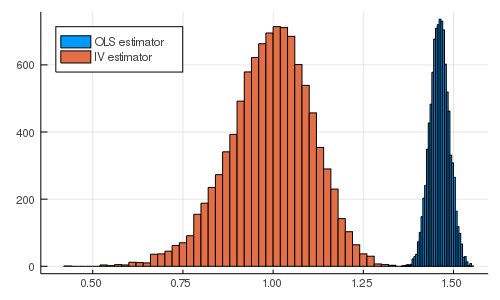

In [87]:
histogram( [coeficients[:,1] coeficients[:,2]], label=["OLS estimator" "IV estimator"],
    size = (500, 300), fmt = :png, legend=:topleft)

## 4. Stepping Up Our Game

****
It is always good to know about creating and using custom Types. This is something that you will usually encounter when cloning repositories from GitHub. For example, you can look at [this code](https://github.com/matthieugomez/FixedEffectModels.jl/blob/master/src/FixedEffectModel.jl) from the `FixedEffectModels.jl` package written by Matthieu Gomez. 

In [53]:
#Pkg.add("Parameters")
using Parameters

We can use the `@enum` macro to define a type that takes some values that can be enumerated. These keywords will then be recognized as the type that you defined, with the corresponding enumeration value.

In [54]:
@enum VarianceType Default=1 White=2

In [55]:
White

White::VarianceType = 2

In [56]:
#It doesn't mean that it is interpreted as a number. Be careful with that!
White == 2 

false

The `@with_kw` macro allows us to set default values in the attributes of some type structure that we want to create. It is super useful. We can use the command `struct` to construct such types. 

In [57]:
struct Foo
   bar::String
   baz::Int
   qux::Float64
end

In [58]:
#Applying a type as a function is called a constructor, btw!
a = Foo("Hello!",1,1.5)

Foo("Hello!", 1, 1.5)

In [59]:
println(typeof(a))
println(typeof(a.bar))
println(typeof(a.baz))
println(typeof(a.qux))

Foo
String
Int64
Float64


Notice that we can't modify the attributes of this structure we have created. 

In [60]:
a.bar = "Bla"

ErrorException: type Foo is immutable

To overcome this we can use the `mutable struct` command. 

In [61]:
@with_kw mutable struct Params
    VarType::VarianceType = Default
end

Params

Now, we will improve our ols function by using these new structures created.

In [62]:
function ols(x,y, params::Params)
   #Extract sample size
   n = size(x, 1)
 
    #Check if there's some problem with the data
    if n != size(y,1)
        error("Incompatible data.") 
    end

    #Recall that the normal eq is xx * bhat = xy
    xx = x'*x;
    xy = x'*y;
    
    #Compute the coefficient vector
    βhat = xx\xy
    
    if params.VarType == Default
        # Get residuals
        res = y - x * βhat;
        avar = (res' * res) ./ xx ;
        se = sqrt.(diag(avar))/sqrt(n);
    elseif params.VarType == White
        # Get residuals
        res = y - x * βhat;
        avar = xx \ ((x.*res)' * (x.*res)) / xx;
        se = sqrt.(diag(avar))/sqrt(n);    
    else
        error("Not a valid VarType. Please set either Default or White.")
    end
    
    return (coef = βhat, se = se)
end

ols (generic function with 2 methods)

Notice that now our function has two methods! 

In [63]:
#I will simulate some data to run this
Xmat , Zmat, Yvec = simulatedata(1000)
p1 = Params();
p2 = Params(VarType=White);

In [64]:
ols(Xmat,Yvec, p1)

(coef = [0.754811; 1.45633], se = [0.0277132, 0.02384])

In [65]:
ols(Xmat,Yvec, p2)

(coef = [0.754811; 1.45633], se = [0.000966033, 0.000849921])

There are a lot of things that could've also been discussed here, but it would take quite a while. **Given that, I strongly suggest to read on your spare time the content [here](https://julia.quantecon.org/index_toc.html). It is very well written and shows a lot of examples and caveats of things that I have shown here.**

## 5. (Optional) More Advanced Stuff

****
Usually our moment conditions leave us with something that looks like a linear system of equations.  For instance, in the case of OLS we have the following system: 

$$ X'X * \beta  = X'Y $$

which can be rewritten as 

$$ A x  = b $$ 


We say a matrix is **ill-conditioned** if the basis of eigenvectors are close to, but not exactly, collinear. This can create numerical errors roughly in proportion to the base-10 log of the condition number. I don't think this is gonna be an issue in any of the computations you will perform in the course, but these type of issues can arise when we are, for instance, running models with many fixed effects (high dimensional FE). 


The condition number (using the 2-norm) can be computed as 

$$ k(A) = || A || * || A^{-1} || $$


In [66]:
#Create ill-conditioned matrix
ϵ = 1E-6
A = [1.0 0.0
     1.0 ϵ]
cond(A)

2.0000000000005004e6

In [67]:
#Notice that it has both huge and tiny values!
inv(A)

2×2 Array{Float64,2}:
  1.0    0.0  
 -1.0e6  1.0e6

This is actually one of the reasons to avoid using `inv()` in practice, and instead use the backslash notation, which will perform better. Another reason is that if the A matrix is sparse, we make it dense when we invert it. The backslash notation will exploit the fact that A was sparse in the first place!

### Factorization

One way to fix this is to do a factorization, which will allow us to compute a more stable inverse (like a triangular matrix). For instance, a QR decomposition splits A into an orthogonal matrix (inverse = transpose) and an upper triangular matrix. The solution is then simplified as

$$ Q R x  = b $$ 
$$ R x  = Q^{T} * b $$
$$ x = R^{-1}  Q^{T} * b $$

In [69]:
illX = [ones(1000)'; ϵ * I]'
illXX = illX'illX;
illXY = illX' * rand(1000,1);

Q, R = qr(illXX);
βsol_qr = R \ (Q'* illXY);

@show βsol_qr[1:5]

βsol_qr[1:5] = [0.21228, 3.58133e5, 668830.0, 3.65371e5, 6.83657e5]


5-element Array{Float64,1}:
      0.21227969023809407
 358132.770475407        
 668829.9824319686       
 365371.30579696025      
 683656.5419907705       

In [70]:
cond(illXX)

3.229517786600101e29

In [71]:
cond(R)

2.8731817474202843e30

In [72]:
cond(R) > cond(illXX)

true

Depending on the particular application and the factorization chosen we can improve a lot the conditioning number.

### Iterative Solution (Krylov Methods)

This is will iterate the system on $x^k$ until it reaches a solution. It is an alternative to factorization. However, it has slow convergence rates when the matrix in the linear system is ill-conditioned. 

A solution to this is to set a matrix $ P $ which has numerically stable inverse. Consider the following case of a right preconditioner P:

$$ A x = b $$
$$ A P^{-1} P  x = b $$
$$ (AP^{-1}) y = b $$ 

so we can use the last equation to solve for $y$ , and then recover $x$ from $P x = y $. 

In [73]:
#Pkg.add("SparseArrays")
using SparseArrays

#This creates a sparse matrix with 10% of zeros
A = sprand(100, 100, 0.1)   
A = A * A'  
cond(Matrix(A)) #Can be ill conditioned!

1.8546178285821911e6

One of the standard Krylov methods is Conjugate Gradient, which works for symmetric and positive definite matrices. This is exactly the case of our least squares problem!

We can choose among many preconditioners, and there's no really a way to know which is gonna work the best. In this case I'll show the solution using an Algebraic Multigrid (AMG) preconditioner.

In [75]:
#Pkg.add("IterativeSolvers")
#Pkg.add("AlgebraicMultigrid")
using IterativeSolvers
using AlgebraicMultigrid

In [76]:
#Initial value
β_init = zeros(100)
b = A * rand(100,1)
P = aspreconditioner(ruge_stuben(A))
sol = cg!(β_init, A, b, Pl = P, log=true, maxiter = 1000)
sol[end]

Converged after 62 iterations.

In [77]:
#Show the vector of coefficients
sol[1]

100-element Array{Float64,1}:
 0.8140076758718121  
 0.5912350455937073  
 0.9423584907399465  
 0.38406978959846105 
 0.4644595533778028  
 0.7108618640403582  
 0.650535755944603   
 0.6131608814248856  
 0.19907936431703835 
 0.71971797418847    
 0.6619960114835616  
 0.9933297012902798  
 0.438651310212625   
 ⋮                   
 0.8959528825863227  
 0.7631376310156138  
 0.8924169661727606  
 0.4208310999476181  
 0.4242576343057581  
 0.023569295752934125
 0.0859614648642639  
 0.011207043510461104
 0.4255761879150625  
 0.07212171243070957 
 0.3656614292176173  
 0.9359863800101303  

Something I would like to point out is that using a preconditioner does not ensure that the number of iterations will reduce.